In [385]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [386]:
df =  pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [387]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [389]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Observation
MonthlyCharges are slightly left skewed.

In [390]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**There are no missing values in the dataset**

In [391]:
df.duplicated().sum()

0

**There are no duplicates in the dataset.**

## Data Preprocessing

In [392]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [393]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [394]:
df['MultipleLines'].replace('No phone service', 'No', inplace = True) #for removing an extra category

In [395]:
df['MultipleLines'].value_counts() 

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

In [396]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [397]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [398]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [399]:
df['OnlineSecurity'].replace('No internet service', 'No', inplace = True) #for removing an extra category

In [400]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

In [401]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [402]:
df['TotalCharges'].value_counts()

TotalCharges
0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6531, dtype: int64

In [403]:
df['OnlineBackup'].value_counts()
df['OnlineBackup'].replace('No internet service', 'No', inplace = True) #for removing an extra category
df['OnlineBackup'].value_counts()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

In [404]:
df['DeviceProtection'].value_counts()
df['DeviceProtection'].replace('No internet service', 'No', inplace = True) #for removing an extra category
df['DeviceProtection'].value_counts()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

In [405]:
df['TechSupport'].value_counts()
df['TechSupport'].replace('No internet service', 'No', inplace = True) #for removing an extra category
df['TechSupport'].value_counts()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

In [406]:
df['StreamingTV'].value_counts()
df['StreamingTV'].replace('No internet service', 'No', inplace = True) #for removing an extra category
df['StreamingTV'].value_counts()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

In [407]:
df['StreamingMovies'].value_counts()
df['StreamingMovies'].replace('No internet service', 'No', inplace = True) #for removing an extra category
df['StreamingMovies'].value_counts()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

**This replacement is neccessary because during the time of data encoding it's unneccesary to encode 3 categories as it will only bring noise to the model.**

In [408]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [409]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**The data is highly imbalanced.**

In [410]:
df.drop('customerID',axis = 1, inplace = True) ##Since this is an irrelevant column for model training therefore we can drop it.

In [411]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


## Exploratory Data Analysis

**Univariate Analysis** 

In [412]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [413]:
## barplot, histplot

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [414]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

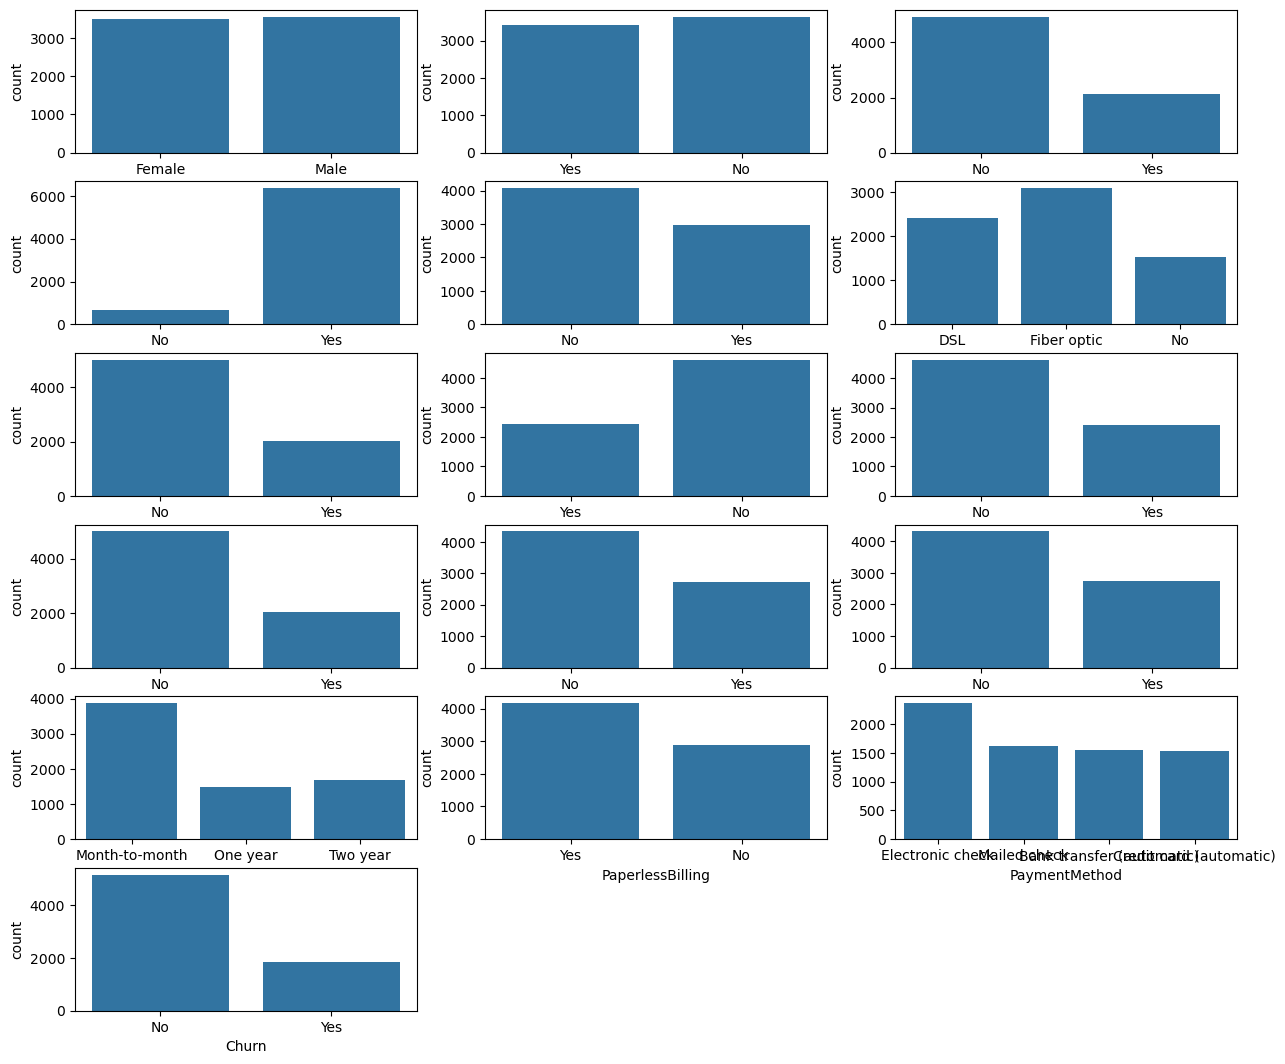

In [415]:
plt.figure(figsize = (15,13))
j = 1
for i in categorical_features:
    plt.subplot(6,3,j)
    sns.countplot(data = df, x = i)
    j = j+1

plt.show()

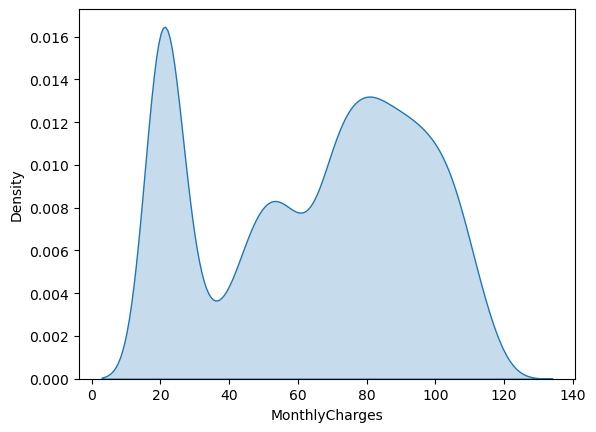

In [416]:
sns.kdeplot(data = df, x='MonthlyCharges', fill = True)
plt.show()

**Bivariate Analysis**

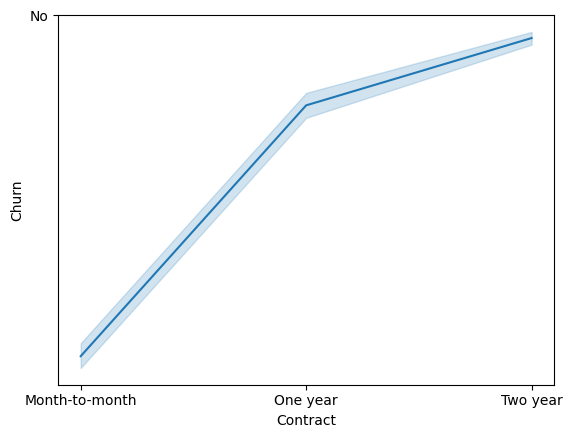

In [417]:
sns.lineplot(data = df, x = 'Contract', y='Churn')
plt.show()

**The churn rate directly depends on the contract type. Higher the time of contract, it's less likely that the customer will churn**

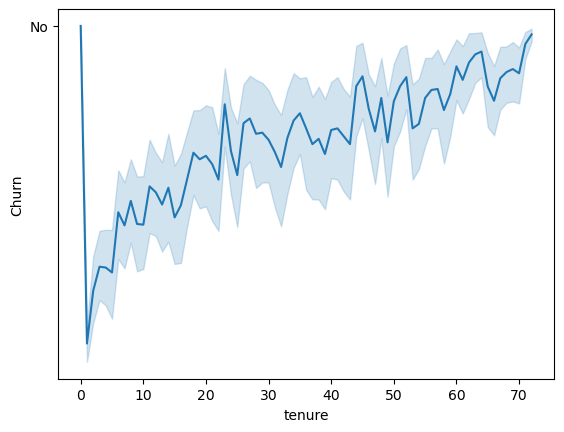

In [418]:
sns.lineplot(data = df, x = 'tenure', y='Churn')
plt.show()

Higher the customer has stayed with the company, the chances of churning decreases

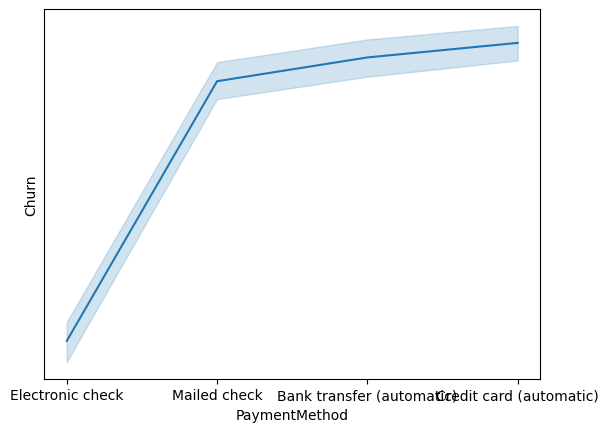

In [419]:
sns.lineplot(data = df, x = 'PaymentMethod', y='Churn')
plt.show()

People who use electronic check are more likely to churn. Customer who uses payment methods like mailed check, bank transfer, credit card are likely to stay. 

**Multivariate Analysis**

In [420]:
df[num_features].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


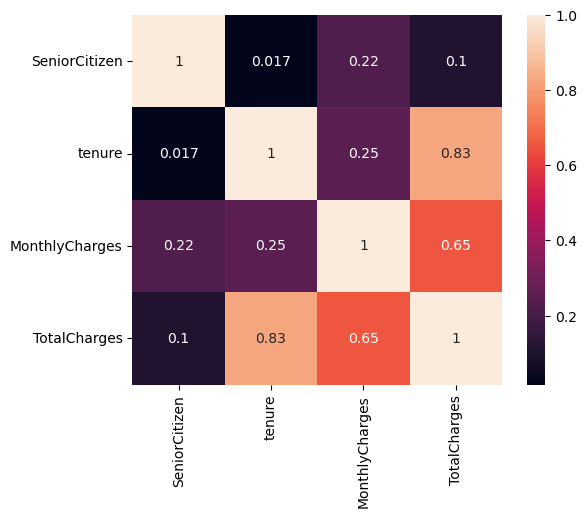

In [421]:
sns.heatmap(df.corr(numeric_only=True), annot = True, square = True)
plt.show()

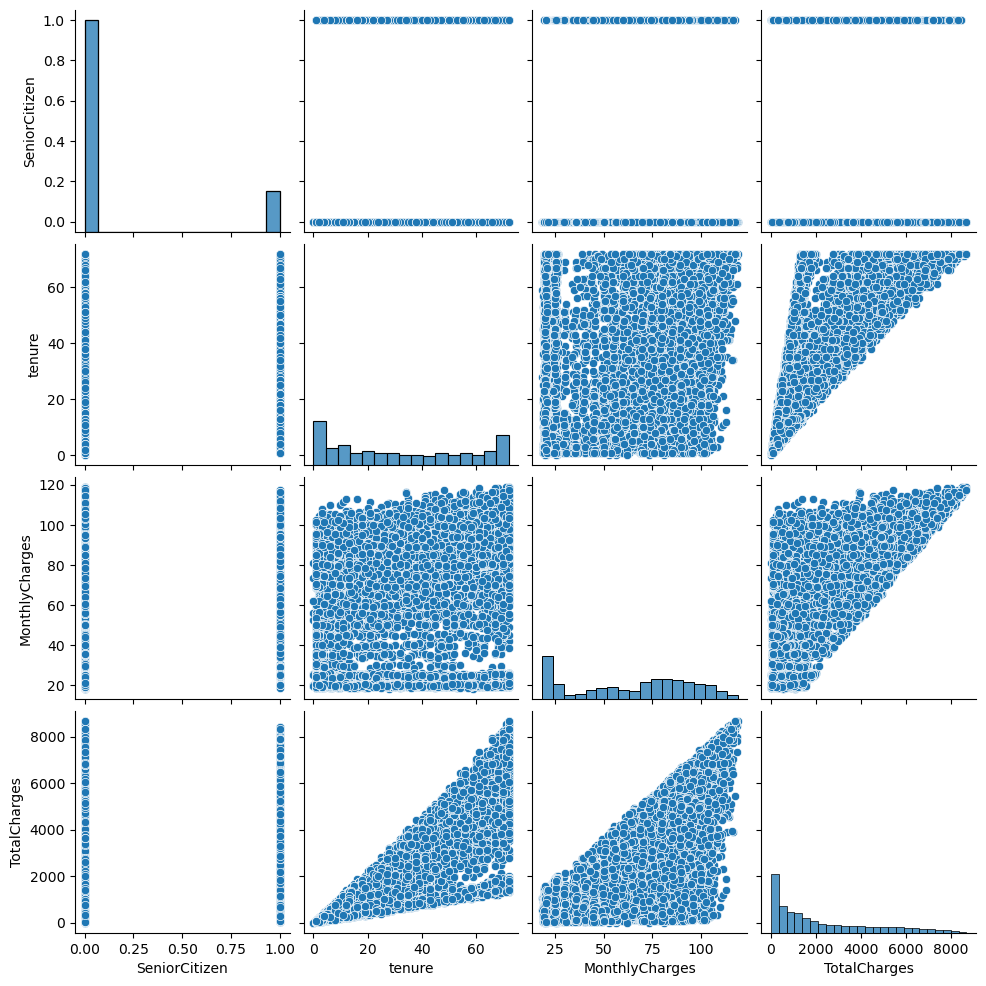

In [422]:
sns.pairplot(data = df)
plt.show()

## Data Encoding - One Hot Encoding and Ordinal Encoding

In [423]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [424]:
df_copy = df.copy()
df_copy.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [425]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

encoding = OneHotEncoder()
encoded = encoding.fit_transform(df_copy[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']]).toarray()

In [426]:
encoded_df = pd.DataFrame(encoded, columns = encoding.get_feature_names_out())

In [427]:
encoded_df.head(1)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [428]:
encoded_df.index = df.index
df = pd.concat([df, encoded_df], axis =1)

In [429]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [430]:
df.drop(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], axis=1, inplace = True)

In [431]:
df.head(1)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,Month-to-month,29.85,29.85,No,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [432]:
## Ordinal Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   Contract                                 7043 non-null   object 
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   object 
 6   gender_Female                            7043 non-null   float64
 7   gender_Male                              7043 non-null   float64
 8   Partner_No                               7043 non-null   float64
 9   Partner_Yes                              7043 non-null   float64
 10  Dependents_No                            7043 no

In [433]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [434]:
ordinal = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df['Contract'] = ordinal.fit_transform(df[['Contract']])
df['Contract'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Contract, dtype: float64

In [435]:
df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0.0,29.85,29.85,No,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,1.0,56.95,1889.50,No,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,0.0,53.85,108.15,Yes,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,1.0,42.30,1840.75,No,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,0.0,70.70,151.65,Yes,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [438]:
df['Churn'].replace('Yes',1, inplace=True)
df['Churn'].replace('No',0, inplace = True)

In [439]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Model Building And Evaluation

In [441]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis =1)
y = df['Churn']

In [442]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.20)

In [443]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5634, 36), (1409, 36), (5634,), (1409,))

In [444]:
## feature scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [445]:
X_train

array([[-0.4377492 , -0.46568336,  0.37290835, ..., -0.52765585,
        -0.70964983,  1.84247002],
       [-0.4377492 ,  0.88553679,  1.5775905 , ..., -0.52765585,
        -0.70964983, -0.54274967],
       [-0.4377492 , -1.28460467, -0.83177379, ..., -0.52765585,
         1.40914569, -0.54274967],
       ...,
       [-0.4377492 , -0.83419795, -0.83177379, ..., -0.52765585,
         1.40914569, -0.54274967],
       [ 2.28441306, -0.83419795, -0.83177379, ..., -0.52765585,
         1.40914569, -0.54274967],
       [-0.4377492 , -0.26095304,  0.37290835, ...,  1.89517467,
        -0.70964983, -0.54274967]])

In [453]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score

models = {
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print(" ")
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('----------------------------------')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8028
- F1 score: 0.7965
- Precision: 0.6556
- Recall: 0.5421
 
Model performance for Test set
- Accuracy: 0.8197
- F1 score: 0.8158
- Precision: 0.6820
- Recall: 0.5979
----------------------------------
Decision Tree
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 0.9987
- Recall: 0.9960
 
Model performance for Test set
- Accuracy: 0.7367
- F1 score: 0.7357
- Precision: 0.5027
- Recall: 0.4906
----------------------------------
Random Forest
Model performance for Training set
- Accuracy: 0.9986
- F1 score: 0.9986
- Precision: 0.9973
- Recall: 0.9973
 
Model performance for Test set
- Accuracy: 0.7942
- F1 score: 0.7816
- Precision: 0.6578
- Recall: 0.4638
----------------------------------
Gradient Boost
Model performance for Training set
- Accuracy: 0.8236
- F1 score: 0.8161
- Precision: 0.7145
- Recall: 0.5588
 
Model performance for Test set
- Accuracy: 0.8126
- F1 score: 0.8

**Gradient Boosting and Logistic Regression has minimal overfitting so we will use hyperparameter tuning to improve model accuracy.**

In [457]:
params = {
    "penalty":['l1', 'l2', 'elasticnet'],
"C" : [100,10,1.0,0.1,0.01],
"solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }

In [458]:
randomcv_models = [
                   ("LR", LogisticRegression(), params),
    ("GradientBoost", GradientBoostingClassifier(), gradient_params)
                   
                   ]


In [459]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"     Best Params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
     Best Params for LR
{'solver': 'saga', 'penalty': 'l1', 'C': 10}
     Best Params for GradientBoost
{'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 5, 'loss': 'exponential', 'criterion': 'squared_error'}


In [462]:
models={
    
    "Logistic Regression":LogisticRegression(solver = 'saga', penalty = 'l1', C = 10),
    "GradientBoostclassifier":GradientBoostingClassifier(n_estimators=100,
                                                        min_samples_split=20,
                                                        max_depth=5,
                                                        loss='exponential',
                                                        criterion='squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)


    
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred) 
    model_test_recall = recall_score(y_test, y_test_pred) 

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('----------------------------------')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8017
- F1 score: 0.7954
- Precision: 0.6532
- Recall: 0.5401
Model performance for Test set
- Accuracy: 0.8197
- F1 score: 0.8156
- Precision: 0.6831
- Recall: 0.5952
----------------------------------
GradientBoostclassifier
Model performance for Training set
- Accuracy: 0.8497
- F1 score: 0.8439
- Precision: 0.7715
- Recall: 0.6163
Model performance for Test set
- Accuracy: 0.8055
- F1 score: 0.7977
- Precision: 0.6678
- Recall: 0.5282
----------------------------------


**Logistic Regression is a better model as compared to Gradient Boosting after Hyperparameter Tuning**